In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from glob import glob

In [3]:
data = pd.read_excel('/content/ANN_Dataset_For_Binary.xlsx')
data

,AC.No,AC Name,Type,District,Winning Candidate,Party,Total Electors,Total Votes,Winning Votes,Poll%,Margin,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,Akkalkuwa,ST,Nandurbar,Adv. K. C. Padavi,1,"2,74,595","1,95,771",82770,0.713,2096,NaN,NaN,NaN
1,2,Shahada,ST,Nandurbar,Rajesh Udesing Padvi,0,"3,16,890","2,06,944",94931,0.653,7991,NaN,NaN,NaN
2,3,Nandurbar,ST,Nandurbar,Vijaykumar Krushnarao Gavit,0,"3,36,325","1,84,968",121605,0.550,70396,NaN,NaN,NaN
3,4,Nawapur,ST,Nandurbar,Naik Shirishkumar Surupsing,1,"2,87,031","2,12,713",74652,0.741,11335,NaN,NaN,NaN
4,5,Sakri,ST,Dhule,Manjula Tulshiram Gavit,0,"3,39,027","2,03,951",76166,0.602,7265,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,284,Shirala,GEN,Sangli,Mansing Fattesingrao Naik,1,"2,91,938","2,27,861",101933,0.781,25931,NaN,NaN,NaN
284,285,Palus-Kadegaon,GEN,Sangli,Kadam Vishwajeet Patangrao,1,"2,75,988","1,85,886",171497,0.674,162521,NaN,NaN,NaN
285,286,Khanapur,GEN,Sangli,Anilbhau Babar,0,"3,21,932","2,13,943",116974,0.665,26291,NaN,NaN,NaN
286,287,Tasgaon-Kavathe Mahankal,GEN,Sangli,Sumanvahini R.R. (Aba) Patil,1,"2,94,333","1,99,528",128371,0.678,62532,NaN,NaN,NaN


In [4]:
data.drop(columns=['Unnamed: 11'], inplace=True)
data.drop(columns=['Unnamed: 12'], inplace=True)
data.drop(columns=['Unnamed: 13'], inplace=True)


In [5]:
def remove_commas(value):
    if isinstance(value, str) and ',' in value:
        return value.replace(',', '')
    return value

# Apply the function to the 'Total Electors' column
data['Total Votes'] = data['Total Votes'].apply(remove_commas)

# Convert the 'Total Electors' column to numeric, handling NaNs appropriately
data['Total Votes'] = pd.to_numeric(data['Total Votes'], errors='coerce')

data['Margin'] = data['Margin'].replace('[^0-9]', '', regex=True)
data['Margin'] = pd.to_numeric(data['Margin'], errors='coerce')

data['Total Electors'] = data['Total Electors'].astype(str)
data['Total Electors'] = data['Total Electors'].str.replace(',', '')
data['Total Electors'] = pd.to_numeric(data['Total Electors'], errors='coerce')

**Data Preprocessing**

In [6]:
# checking null values

data.isnull().sum()

,0
AC.No,0
AC Name,0
Type,0
District,0
Winning Candidate,0
Party,0
Total Electors,0
Total Votes,0
Winning Votes,0
Poll%,0


In [7]:
## dropping unwanted column

data.drop(columns=['AC.No'], inplace=True)
data.drop(columns=['Winning Candidate'], inplace=True)

In [8]:
len(data['District'].value_counts())

35

In [9]:
data.District.unique()

array(['Nandurbar', 'Dhule', 'Jalgaon', 'Buldana', 'Akola', 'Washim',
       'Amravati', 'Wardha', 'Nagpur', 'Bhandara', 'Gondiya',
       'Gadchiroli', 'Chandrapur', 'Yavatmal', 'Nanded', 'Hingoli',
       'Parbhani', 'Jalna', 'Aurangabad', 'Nashik', 'Thane',
       'Mumbai (Suburban)', 'Mumbai', 'Raigarh', 'Pune', 'Ahmadnagar',
       'Bid', 'Latur', 'Osmanabad', 'Solapur', 'Satara', 'Ratnagiri',
       'Sindhudurg', 'Kolhapur', 'Sangli'], dtype=object)

In [10]:
## encoding categorical variable district
data.loc[data['District'] == 'Mumbai (Suburban)', 'District'] = 34
data.loc[data['District'] == 'Thane', 'District'] = 33
data.loc[data['District'] == 'Pune', 'District'] = 32
data.loc[data['District'] == 'Nashik', 'District'] = 31
data.loc[data['District'] == 'Nagpur', 'District'] = 30
data.loc[data['District'] == 'Ahmadnagar', 'District'] = 29
data.loc[data['District'] == 'Jalgaon', 'District'] = 28
data.loc[data['District'] == 'Solapur', 'District'] = 27
data.loc[data['District'] == 'Kolhapur', 'District'] = 26
data.loc[data['District'] == 'Mumbai', 'District'] = 25
data.loc[data['District'] == 'Nanded', 'District'] = 24
data.loc[data['District'] == 'Aurangabad', 'District'] = 23
data.loc[data['District'] == 'Sangli', 'District'] = 22
data.loc[data['District'] == 'Satara', 'District'] = 21
data.loc[data['District'] == 'Amravati', 'District'] = 20
data.loc[data['District'] == 'Yavatmal', 'District'] = 19
data.loc[data['District'] == 'Raigarh', 'District'] = 18
data.loc[data['District'] == 'Buldana', 'District'] = 17
data.loc[data['District'] == 'Chandrapur', 'District'] = 16
data.loc[data['District'] == 'Latur', 'District'] = 15
data.loc[data['District'] == 'Bid', 'District'] = 14
data.loc[data['District'] == 'Ratnagiri', 'District'] = 13
data.loc[data['District'] == 'Jalna', 'District'] = 12
data.loc[data['District'] == 'Dhule', 'District'] = 11
data.loc[data['District'] == 'Akola', 'District'] = 10
data.loc[data['District'] == 'Parbhani', 'District'] = 9
data.loc[data['District'] == 'Gondiya', 'District'] = 8
data.loc[data['District'] == 'Osmanabad', 'District'] = 7
data.loc[data['District'] == 'Wardha', 'District'] = 6
data.loc[data['District'] == 'Nandurbar', 'District'] = 5
data.loc[data['District'] == 'Hingoli', 'District'] = 4
data.loc[data['District'] == 'Gadchiroli', 'District'] = 3
data.loc[data['District'] == 'Bhandara', 'District'] = 2
data.loc[data['District'] == 'Washim', 'District'] = 1
data.loc[data['District'] == 'Sindhudurg', 'District'] = 0



In [11]:
## encoding ac name
ac_name_counts = data['AC Name'].value_counts().to_dict()
ac_name_counts

{'Akkalkuwa': 1,
 'Shahada': 1,
 'Khed Alandi': 1,
 'Ambegaon': 1,
 'Junnar': 1,
 'Mahad': 1,
 'Shrivardhan': 1,
 'Alibag': 1,
 'Pen': 1,
 'Uran': 1,
 'Karjat': 1,
 'Panvel': 1,
 'Colaba': 1,
 'Mumbadevi': 1,
 'Malabar Hill': 1,
 'Byculla': 1,
 'Shivadi': 1,
 'Shirur': 1,
 'Daund': 1,
 'Indapur': 1,
 'Shivajinagar': 1,
 'Kasbapeth': 1,
 'Pune Cantonment': 1,
 'Hadapsar': 1,
 'Parvati': 1,
 'Khadakwasala': 1,
 'Kothrud': 1,
 'Vadgaon Sheri': 1,
 'Baramati': 1,
 'Bhosari': 1,
 'Pimpri': 1,
 'Chinchwad': 1,
 'Maval': 1,
 'Bhor': 1,
 'Purandar': 1,
 'Worli': 1,
 'Mahim': 1,
 'Wadala': 1,
 'Magathane': 1,
 'Kandivali East': 1,
 'Dindoshi': 1,
 'Jogeshwari East': 1,
 'Bhandup West': 1,
 'Vikhroli': 1,
 'Mulund': 1,
 'Dahisar': 1,
 'Malad West': 1,
 'Borivali': 1,
 'Belapur': 1,
 'Airoli': 1,
 'Mumbra-Kalwa': 1,
 'Thane': 1,
 'Kopri-Pachpakhadi': 1,
 'Charkop': 1,
 'Goregaon': 1,
 'Sion Koliwada': 1,
 'Anushakti Nagar': 1,
 'Dharavi': 1,
 'Vandre West': 1,
 'Vandre East': 1,
 'Kalina': 1,
 'K

In [12]:
for ac_name, count in ac_name_counts.items():
    data.loc[data['AC Name'] == ac_name, 'AC Name'] = count

In [13]:
## encoding type
data.Type = data.Type.map({'GEN':2 , 'SC':1 , 'ST':0})

**Outliers handling**

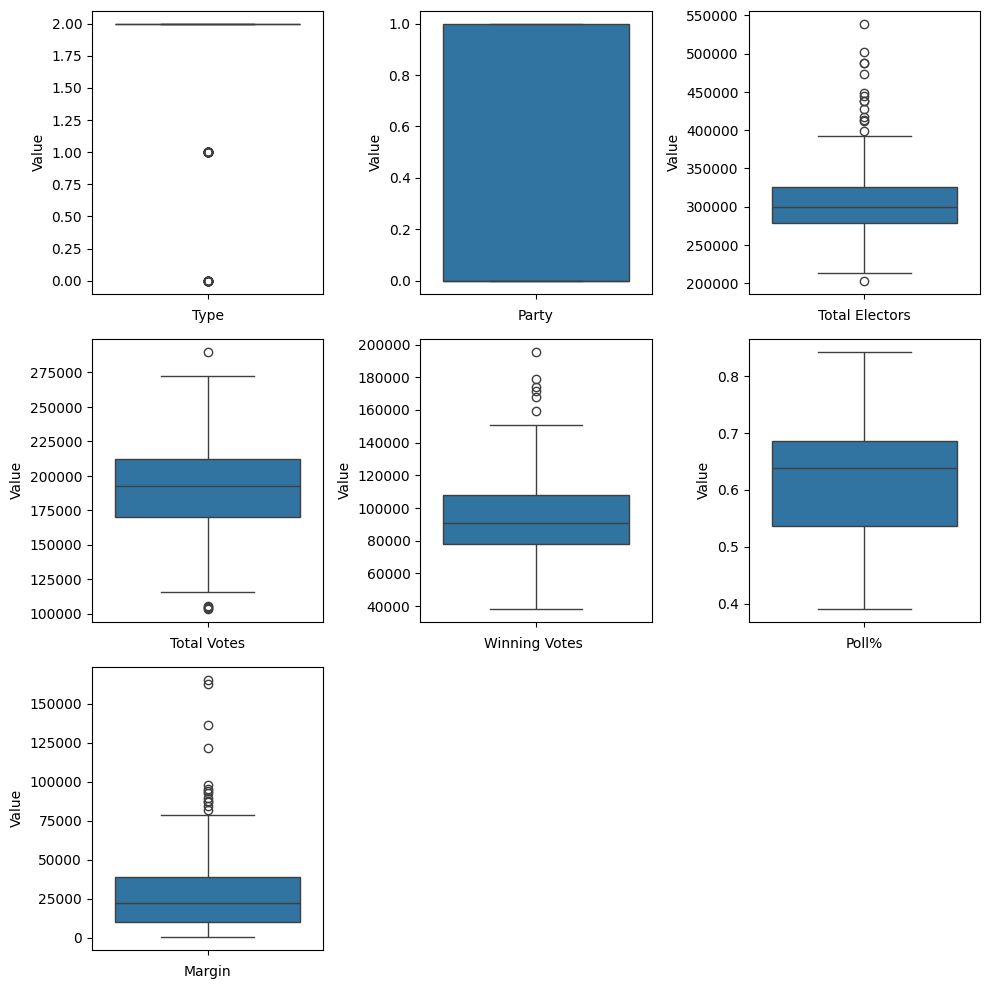

In [14]:
# Select only numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(10, 10), facecolor='white')  # Canvas size
plotnumber = 1

for column in numeric_columns:
    if plotnumber <= 9:  # Adjust grid size based on the number of numeric columns
        ax = plt.subplot(3, 3, plotnumber)  # 3x3 grid
        sns.boxplot(y=data[column], ax=ax)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Value', fontsize=10)
    plotnumber += 1

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [15]:
## iqr for winning votes

Q1=data['Winning Votes '].quantile(0.25)
print('Lower quantile',Q1)
Q3=data['Winning Votes '].quantile(0.75)
print('Upper quantile',Q3)

IQR = Q3-Q1
print('IQR',IQR)

lower_limit = Q1 - 1.5*IQR
print('lower_limit',lower_limit)

upper_limit = Q3 + 1.5*IQR
print('upper_limit',upper_limit)

Lower quantile 78016.0
Upper quantile 107937.25
IQR 29921.25
lower_limit 33134.125
upper_limit 152819.125


In [16]:
data.loc[data['Winning Votes ']>upper_limit]

,AC Name,Type,District,Party,Total Electors,Total Votes,Winning Votes,Poll%,Margin
138,1,2,33,0,386790,226078,174068,0.584,136040
187,1,2,18,0,539357,290082,179109,0.538,92730
200,1,2,32,1,339800,233461,195641,0.687,165265
203,1,2,32,1,337769,246734,167712,0.730,93942
206,1,2,32,0,413810,259827,159295,0.628,77567
284,1,2,22,1,275988,185886,171497,0.674,162521


In [17]:
data.loc[data['Winning Votes ']<lower_limit]

,AC Name,Type,District,Party,Total Electors,Total Votes,Winning Votes,Poll%,Margin


In [18]:
data.loc[data['Winning Votes ']>upper_limit,'Winning Votes ']=data['Winning Votes '].median()

In [19]:

## iqr method total electors

Q1=data['Total Electors'].quantile(0.25)
print('Lower quantile',Q1)
Q3=data['Total Electors'].quantile(0.75)
print('Upper quantile',Q3)

IQR = Q3-Q1
print('IQR',IQR)

lower_limit = Q1 - 1.5*IQR
print('lower_limit',lower_limit)

upper_limit = Q3 + 1.5*IQR
print('upper_limit',upper_limit)

Lower quantile 278901.0
Upper quantile 325612.0
IQR 46711.0
lower_limit 208834.5
upper_limit 395678.5


In [20]:
data.loc[data['Total Electors']>upper_limit]

,AC Name,Type,District,Party,Total Electors,Total Votes,Winning Votes,Poll%,Margin
57,1,2,30,0,417590,256965,118182.0,0.615,11116
131,1,2,33,0,487579,265849,149868.0,0.545,43729
137,1,2,33,0,438025,186248,65486.0,0.425,22277
143,1,2,33,0,411955,191822,93927.0,0.466,7154
144,1,2,33,0,428358,209013,79575.0,0.488,15526
145,1,2,33,0,438280,187615,117593.0,0.428,84008
149,1,2,33,0,448791,191211,114645.0,0.426,78491
187,1,2,18,0,539357,290082,91072.5,0.538,92730
204,1,2,32,0,502865,272357,150723.0,0.542,38498
206,1,2,32,0,413810,259827,91072.5,0.628,77567


In [21]:
data.loc[data['Total Electors']>upper_limit,'Total Electors']=data['Total Electors'].median()

In [22]:
Q1=data['Margin'].quantile(0.25)
print('Lower quantile',Q1)
Q3=data['Margin'].quantile(0.75)
print('Upper quantile',Q3)

IQR = Q3-Q1
print('IQR',IQR)

lower_limit = Q1 - 1.5*IQR
print('lower_limit',lower_limit)

upper_limit = Q3 + 1.5*IQR
print('upper_limit',upper_limit)

Lower quantile 10116.5
Upper quantile 38723.5
IQR 28607.0
lower_limit -32794.0
upper_limit 81634.0


In [23]:
data.loc[data['Margin']>upper_limit]

,AC Name,Type,District,Party,Total Electors,Total Votes,Winning Votes,Poll%,Margin
84,1,2,24,1,277129,206085,140559.0,0.744,97445
95,1,2,9,0,301366,190674,104584.0,0.633,81790
138,1,2,33,0,386790,226078,91072.5,0.584,136040
145,1,2,33,0,300112,187615,117593.0,0.428,84008
146,1,2,33,0,348060,168515,113497.0,0.484,89300
151,1,2,34,0,291748,155869,123712.0,0.534,95021
187,1,2,18,0,300112,290082,91072.5,0.538,92730
200,1,2,32,1,339800,233461,91072.5,0.687,165265
203,1,2,32,1,337769,246734,91072.5,0.730,93942
217,1,2,29,0,261188,185122,132316.0,0.709,87024


In [24]:
data.loc[data['Margin']<lower_limit]

,AC Name,Type,District,Party,Total Electors,Total Votes,Winning Votes,Poll%,Margin


In [25]:
data.loc[data['Margin']>upper_limit,'Margin']=data['Margin'].median()

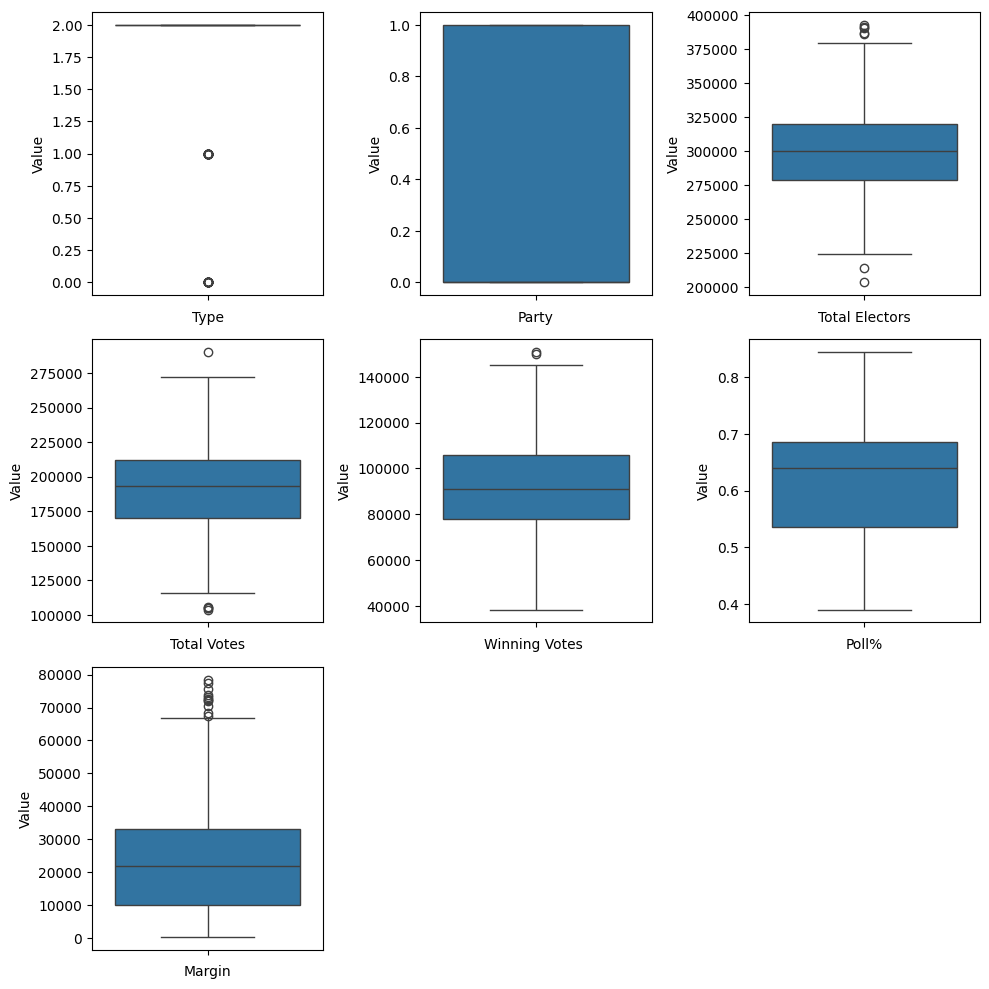

In [26]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(10, 10), facecolor='white')  # Canvas size
plotnumber = 1

for column in numeric_columns:
    if plotnumber <= 9:  # Adjust grid size based on the number of numeric columns
        ax = plt.subplot(3, 3, plotnumber)  # 3x3 grid
        sns.boxplot(y=data[column], ax=ax)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Value', fontsize=10)
    plotnumber += 1

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score

In [28]:
## model building

x=data.drop(columns=['Party'])
y=data['Party']

In [29]:
## split the data
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)



In [30]:
# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [31]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from collections import Counter

In [32]:
sm = SMOTE()
print(Counter(y_train))
x_sm, y_sm = sm.fit_resample(x_train_scaled, y_train)
print(Counter(y_sm))

Counter({0: 152, 1: 78})
Counter({1: 152, 0: 152})


In [33]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')  # 5 units for 5 classes
])


In [34]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
import tensorflow as tf
y_sm_encoded = tf.keras.utils.to_categorical(y_sm, num_classes=5)

In [36]:
history = model.fit(x_sm, y_sm_encoded, epochs=100, batch_size=16, validation_split=0.2, verbose=1)


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3075 - loss: 1.5757 - val_accuracy: 0.0656 - val_loss: 1.4683
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6406 - loss: 1.1507 - val_accuracy: 0.0328 - val_loss: 1.2625
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6362 - loss: 0.9152 - val_accuracy: 0.0328 - val_loss: 1.0894
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6509 - loss: 0.7623 - val_accuracy: 0.0492 - val_loss: 1.0316
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6818 - loss: 0.6813 - val_accuracy: 0.3115 - val_loss: 0.9042
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6177 - loss: 0.6709 - val_accuracy: 0.3443 - val_loss: 0.9033
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6750 - loss: 0.6136 - val_accuracy: 0.4262 - val_loss: 0.8780
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6432 - loss: 0.6127 - val_accuracy: 0.4918 -

In [37]:
# Evaluate the model
y_pred = model.predict(x_test_scaled)
y_pred_classes = y_pred.argmax(axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [38]:
# Print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy}")
report = classification_report(y_test, y_pred_classes)
print("Classification Report:\n", report)

Accuracy: 0.6206896551724138
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71        38
           1       0.45      0.45      0.45        20

    accuracy                           0.62        58
   macro avg       0.58      0.58      0.58        58
weighted avg       0.62      0.62      0.62        58



In [41]:
from sklearn.model_selection import StratifiedKFold,KFold
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [54]:


# Define StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Collect results
fold_no = 1
acc_per_fold = []
loss_per_fold = []

for train_index, val_index in kfold.split(x, y):
    # Split the data
    X_train_fold, X_val_fold = x.iloc[train_index], x.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]


    # Define the model
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_fold.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification
    ])

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train_fold, y_train_fold,
                        epochs=10,
                        batch_size=32,
                        validation_data=(X_val_fold, y_val_fold),
                        verbose=0)

    # Evaluate the model
    scores = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    print(f"Fold {fold_no} - Loss: {scores[0]} - Accuracy: {scores[1]}")
    acc_per_fold.append(scores[1])
    loss_per_fold.append(scores[0])
    fold_no += 1

# Print final results
print("Average scores for all folds:")
print(f"> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})")
print(f"> Loss: {np.mean(loss_per_fold)}")


Fold 1 - Loss: 551.6248779296875 - Accuracy: 0.4482758641242981
Fold 2 - Loss: 186.14634704589844 - Accuracy: 0.36206895112991333
Fold 3 - Loss: 443.3713684082031 - Accuracy: 0.6551724076271057
Fold 4 - Loss: 181.6426239013672 - Accuracy: 0.5614035129547119
Fold 5 - Loss: 173.91824340820312 - Accuracy: 0.5789473652839661
Average scores for all folds:
> Accuracy: 0.521173620223999 (+- 0.10347975984200167)
> Loss: 307.3406921386719
